<a href="https://colab.research.google.com/github/matt-balda/pln-2023/blob/master/word2vec_model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# !pip install -U spacy
# !pip install -U pydantic
# !python -m spacy download 'pt_core_news_sm'

In [104]:
import requests
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import spacy
from gensim.models import Word2Vec
from io import StringIO
import matplotlib.pyplot as plt

In [105]:
nltk.download('punkt')
nltk.download('stopwords')

# nltk.download('rslp')
# nlp = spacy.load('pt_core_news_sm')

stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
url = "https://raw.githubusercontent.com/franciellevargas/HateBR/main/dataset/HateBR.csv"
response = requests.get(url)
csv_data = response.text

In [107]:
column_names = ["instagram_comments", "offensive_language", "offensiveness_levels", "hate_speech"]
df = pd.read_csv(StringIO(csv_data), header=None, names=column_names)

In [108]:
print(df)

                                     instagram_comments  offensive_language  \
0                                    instagram_comments  offensive_language   
1                                         este lixo ...                   1   
2                                          Mais um lixo                   1   
3                       Essa nao tem vergonha na cara!!                   1   
4                        Essa mulher é doente.pilantra!                   1   
...                                                 ...                 ...   
6996                      Time perdendo a credibilidade                   0   
6997  Siga em frente Presidente Bolsonaro! Afinal o ...                   0   
6998  Tantas coisas importantes para resolver e fica...                   0   
6999  A TIME escolhe quem eles quiser, isso não sign...                   0   
7000  Hitler também foi considerado o homem do ano p...                   0   

      offensiveness_levels  hate_speech  
0     off

In [109]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

In [110]:
df['instagram_comments'] = df['instagram_comments'].apply(preprocess_text)

In [111]:
model = Word2Vec(df['instagram_comments'], vector_size=100, window=5, min_count=1, sg=0)

In [112]:
model.save("word2vec_model")

In [113]:
word = input(str('Insira uma palavra: '))

Insira uma palavra: presidente


In [114]:
word_vector = model.wv[word]

In [115]:
print(f"Vetor da palavra '{word}':")
print(word_vector)

Vetor da palavra 'presidente':
[-0.09684467  0.16689591  0.061403    0.02771818  0.05076872 -0.32955575
  0.06035765  0.4093277  -0.09382007 -0.04914742 -0.12867805 -0.3120353
 -0.03314633  0.09732172  0.05794705 -0.14597918 -0.00325575 -0.25610706
  0.0595042  -0.36210397  0.149418    0.10217115  0.10662253 -0.1393187
 -0.03189869  0.02698861 -0.14560372 -0.14368568 -0.20990248  0.0474682
  0.2299021   0.01887954  0.04285747 -0.15141183 -0.03453303  0.18129832
  0.02195229 -0.16636759 -0.07163126 -0.33778992 -0.00403758 -0.17233424
 -0.09874285 -0.00098444  0.14447233 -0.03560561 -0.16300486 -0.08426696
  0.12983684  0.14892085  0.1171281  -0.16771786 -0.05678635 -0.06602511
 -0.07508904  0.11746819  0.08673792 -0.01813086 -0.1535223   0.04367534
 -0.00420809 -0.02947967 -0.12207786  0.02048373 -0.19065872  0.20187889
  0.0887523   0.12195686 -0.21806045  0.2724486  -0.12589005  0.13711628
  0.25128475 -0.07958509  0.10280712  0.0623436   0.07336333 -0.02501391
 -0.13382673  0.1135925

In [116]:
similar_words = model.wv.most_similar(word, topn=10)
print(f"\nPalavras similares a '{word}':")
for similar_word, score in similar_words:
    print(f"{similar_word}: {score:.4f}")



Palavras similares a 'presidente':
povo: 0.9986
pra: 0.9986
ter: 0.9984
q: 0.9983
governo: 0.9983
país: 0.9983
brasil: 0.9983
bolsonaro: 0.9983
contra: 0.9983
vai: 0.9983


In [117]:
out_of_vocab_word = 'balda'
if out_of_vocab_word not in model.wv.index_to_key:
    print(f"'{out_of_vocab_word}' não está no vocabulário do modelo.")
else:
    print('Está no vacabulário do modelo.')

'balda' não está no vocabulário do modelo.


In [118]:
similarity = model.wv.similarity('politico', 'corrupcao')
print(f"Similaridade entre 'politico' e 'corrupcao': {similarity:.4f}")

Similaridade entre 'politico' e 'corrupcao': 0.0988


In [119]:
most_similar_to_set = model.wv.most_similar_to_given('homem', ['pobre', 'feio'])
print(f"Palavra mais similar a 'homem' dentre 'pobre' e 'feio': {most_similar_to_set}")

Palavra mais similar a 'homem' dentre 'pobre' e 'feio': feio


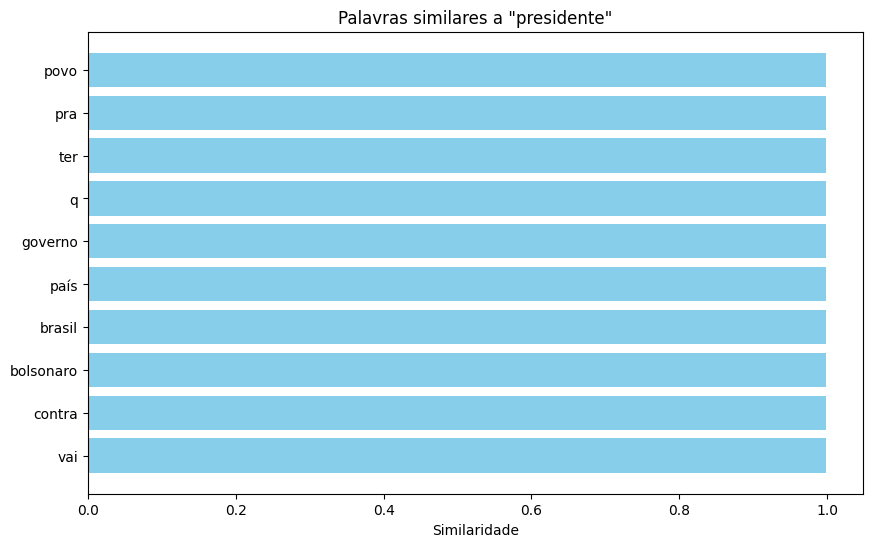

In [120]:
similar_words_df = pd.DataFrame(similar_words, columns=['Palavra', 'Similaridade'])

plt.figure(figsize=(10, 6))
plt.barh(similar_words_df['Palavra'], similar_words_df['Similaridade'], color='skyblue')
plt.xlabel('Similaridade')
plt.title(f'Palavras similares a "{word}"')
plt.gca().invert_yaxis()
plt.show()